In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time
import sys

# Import the LJSimulator class
from LJSimulator import LJSimulator

# Set simulation parameters
N = 64              # Number of particles
Lx = Ly = 10.0      # Box dimensions
temperature = 1.0   # Initial temperature
dt = 0.01           # Time step
num_steps = 1000     # Number of simulation steps
anim_interval = 5   # Save position every N steps for animation
equilibrium_steps = 100  # Steps to discard until equilibrium

# Create the simulation
sim = LJSimulator(N=N, Lx=Lx, Ly=Ly, temperature=temperature, dt=dt,
                  lattice_type='triangular', snapshot_interval=anim_interval)

print(f"Starting simulation with {N} particles for {num_steps} steps")
start_time = time.time()

# Run the simulation with progress updates
update_interval = max(1, num_steps // 20)  # Update every 5%

# Discard the first equilibrium_steps steps to reach equilibrium
print(f"Discarding first {equilibrium_steps} steps to reach equilibrium...")
for i in range(equilibrium_steps):
    sim.step()

# Clear history to start fresh after equilibrium
sim.clear_history()

# Run the main simulation
print(f"Running main simulation for {num_steps} steps...")
for i in range(num_steps):
    sim.step()

    # Print progress updates
    if (i+1) % update_interval == 0 or i == num_steps-1:
        progress = (i+1) / num_steps * 100
        elapsed = time.time() - start_time
        eta = elapsed / (i+1) * (num_steps - i - 1)

        # Print progress bar
        sys.stdout.write(f"\rProgress: {progress:.1f}% | Step: {i+1}/{num_steps} | ")
        sys.stdout.write(f"Time: {elapsed:.1f}s | ETA: {eta:.1f}s | ")
        sys.stdout.write(f"T: {sim.temperature:.3f} | P: {sim.pressure:.3f}")
        sys.stdout.flush()

print(f"\nSimulation completed in {time.time() - start_time:.2f} seconds")

# Create animation from the snapshots
def create_animation():
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(0, Lx)
    ax.set_ylim(0, Ly)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Lennard-Jones Particles Simulation (N={N}, Lx={Lx}, Ly={Ly})')
    ax.grid(True)

    # Create scatter plot for particles
    particles = ax.scatter([], [], s=30)

    # Initialize function
    def init():
        particles.set_offsets(np.c_[[], []])
        return [particles]

    # Animation function
    def animate(i):
        snapshot = sim.snapshots[i]
        positions = snapshot['positions']
        particles.set_offsets(positions)
        return [particles]

    # Create animation
    anim = FuncAnimation(
        fig, animate, init_func=init,
        frames=len(sim.snapshots), interval=50, blit=True
    )

    return anim, fig

# Plot the energy, temperature, and pressure evolution
def plot_results():
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

    # Plot energies
    ax1.plot(sim.time_history, sim.kinetic_energy_history, label='Kinetic Energy')
    ax1.plot(sim.time_history, sim.potential_energy_history, label='Potential Energy')
    ax1.plot(sim.time_history, sim.total_energy_history, label='Total Energy')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Energy')
    ax1.legend()
    ax1.grid(True)

    # Plot temperature
    ax2.plot(sim.time_history, sim.temperature_history)
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Temperature')
    ax2.grid(True)

    # Plot pressure
    ax3.plot(sim.time_history, sim.pressure_history)
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Pressure')
    ax3.grid(True)

    plt.tight_layout()
    return fig

Starting simulation with 64 particles for 1000 steps
Discarding first 100 steps to reach equilibrium...
Running main simulation for 1000 steps...
Progress: 5.0% | Step: 50/1000 | Time: 0.6s | ETA: 12.3s | T: 0.994 | P: 0.833Running main simulation for 1000 steps...
Progress: 100.0% | Step: 1000/1000 | Time: 4.8s | ETA: 0.0s | T: 0.875 | P: 1.373
Simulation completed in 4.80 seconds
Progress: 100.0% | Step: 1000/1000 | Time: 4.8s | ETA: 0.0s | T: 0.875 | P: 1.373
Simulation completed in 4.80 seconds


Creating animation...
Creating plots...


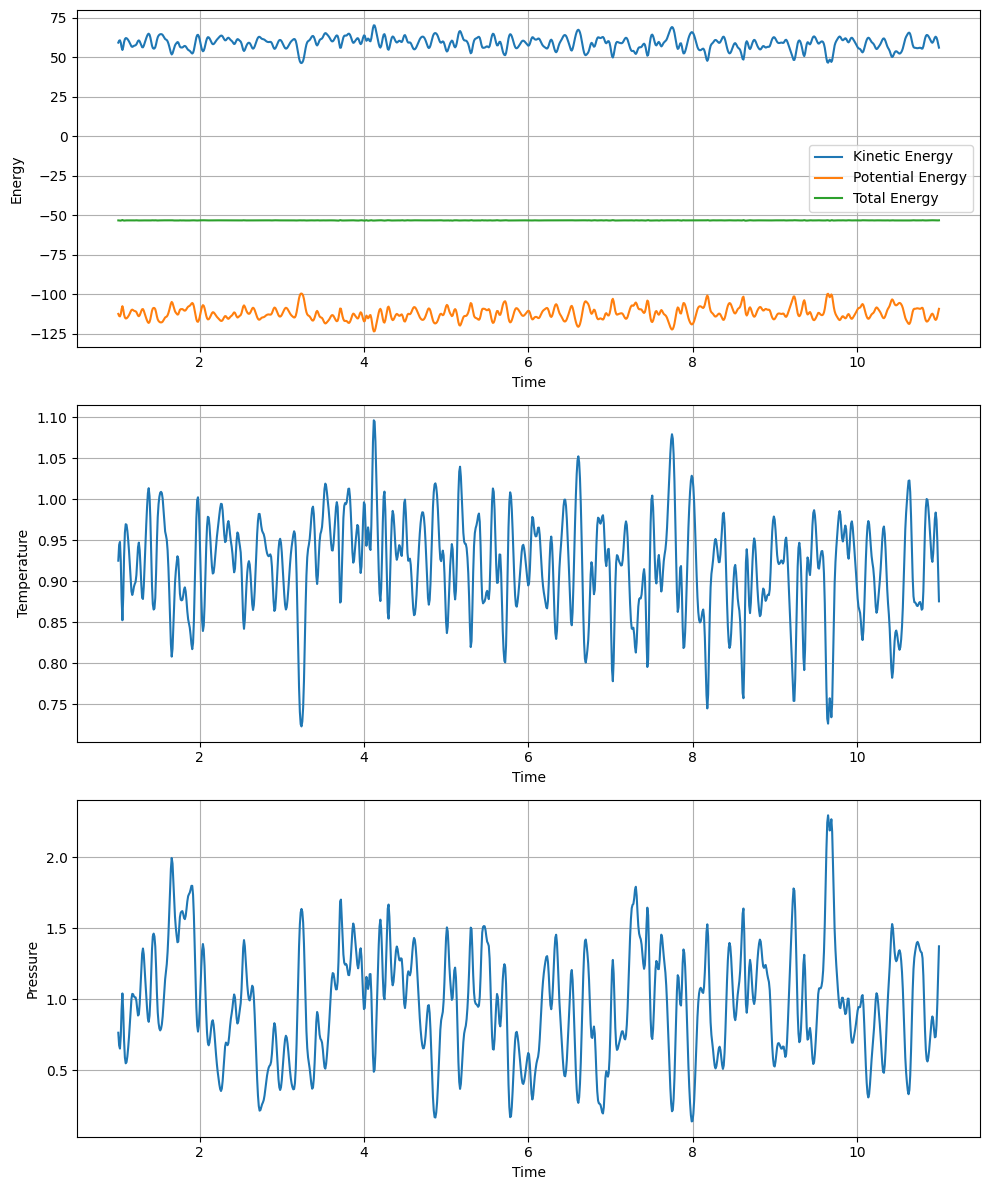

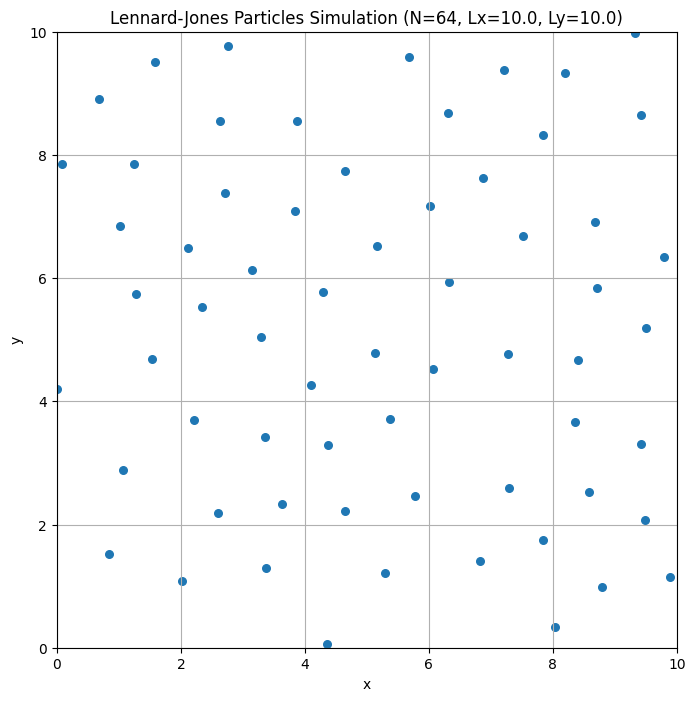

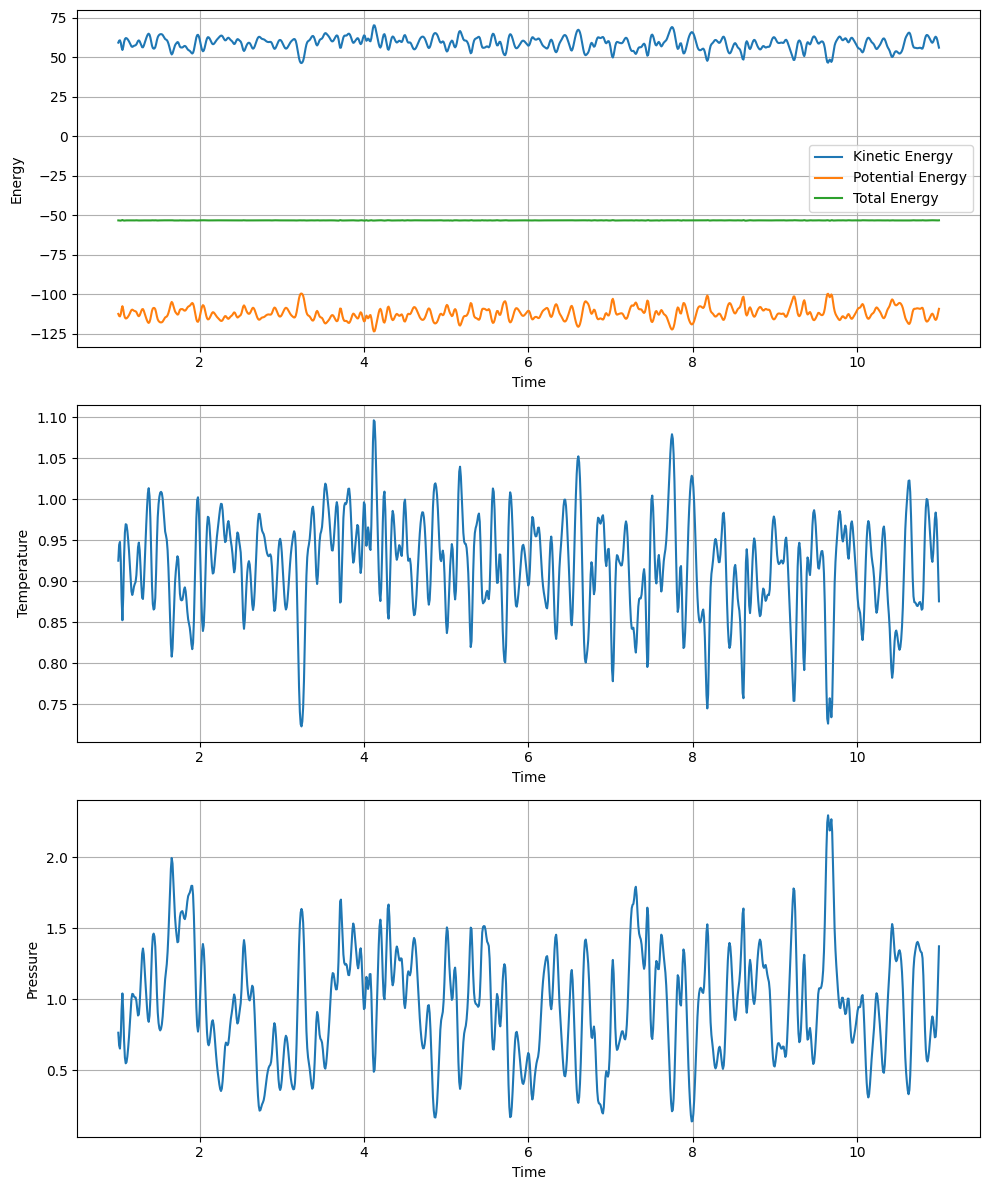

In [11]:
### Main execution ###

# # Plot the initial positions of the particles
# initial_positions = sim.snapshots[0]['positions']
# plt.figure(figsize=(8, 8))
# plt.scatter(initial_positions[:, 0], initial_positions[:, 1], s=30)
# plt.xlim(0, Lx)
# plt.ylim(0, Ly)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Initial Positions of Particles')
# plt.grid(True)
# plt.show()

print("Creating animation...")
anim, anim_fig = create_animation()

print("Creating plots...")
energy_fig = plot_results()

# For Jupyter notebook
display(HTML(anim.to_jshtml()))
display(energy_fig)

# To save the animation to a file (optional)
# print("Saving animation...")
# anim.save('lj_simulation.mp4', writer='ffmpeg', fps=30)

# For displaying in a standard Python script
# plt.show()
# plt.close(anim_fig)
# plt.close(energy_fig)
plt.show()

Running simulation to reach equilibrium for 20 time units (2000 steps)...
Starting recording after reaching equilibrium...
Starting recording after reaching equilibrium...
Forced phase change: resized box to Lx=5.0, Ly=5.0
Forced phase change: resized box to Lx=5.0, Ly=5.0
Plotting full history (equilibrium through phase change)...
Plotting full history (equilibrium through phase change)...


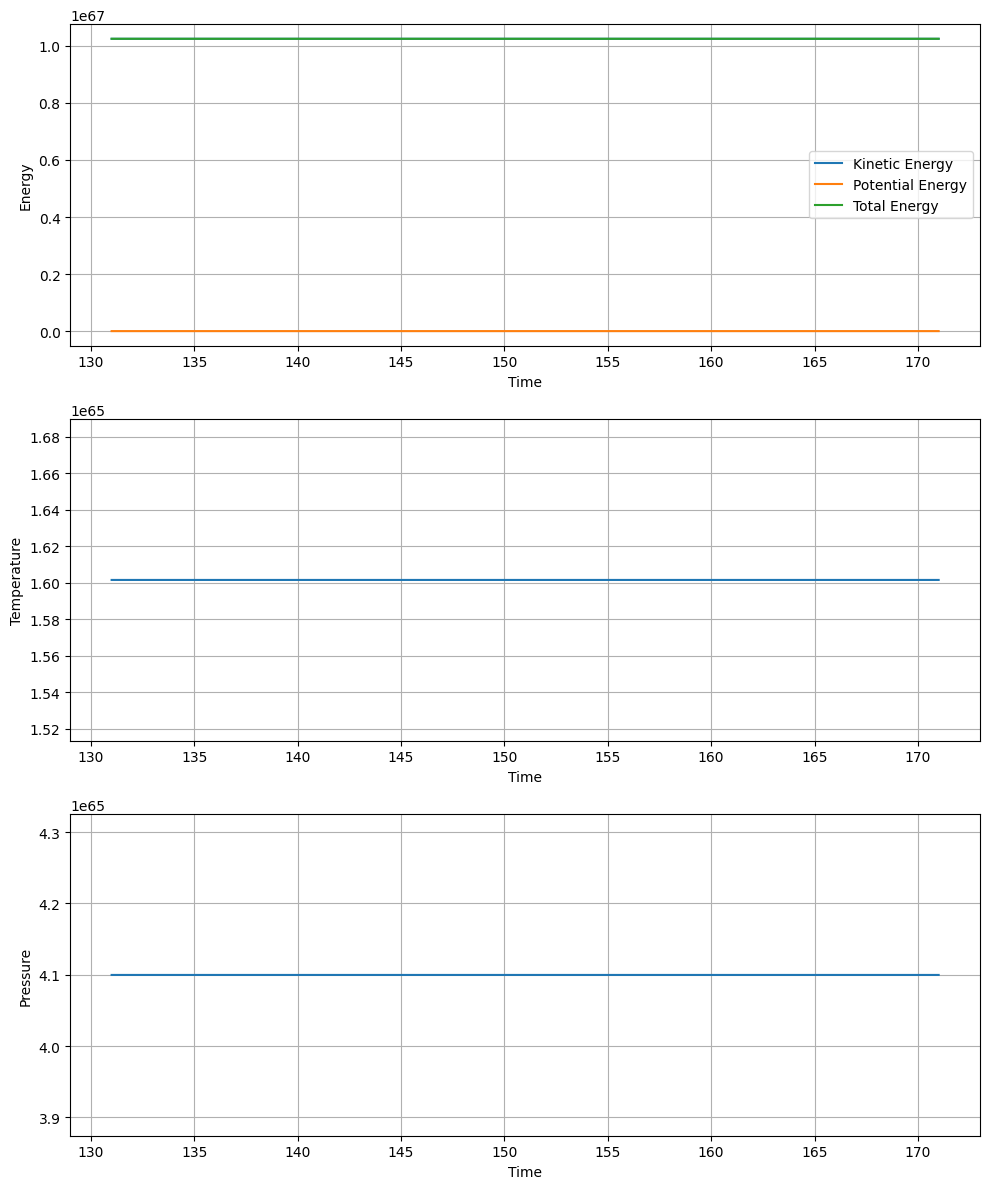

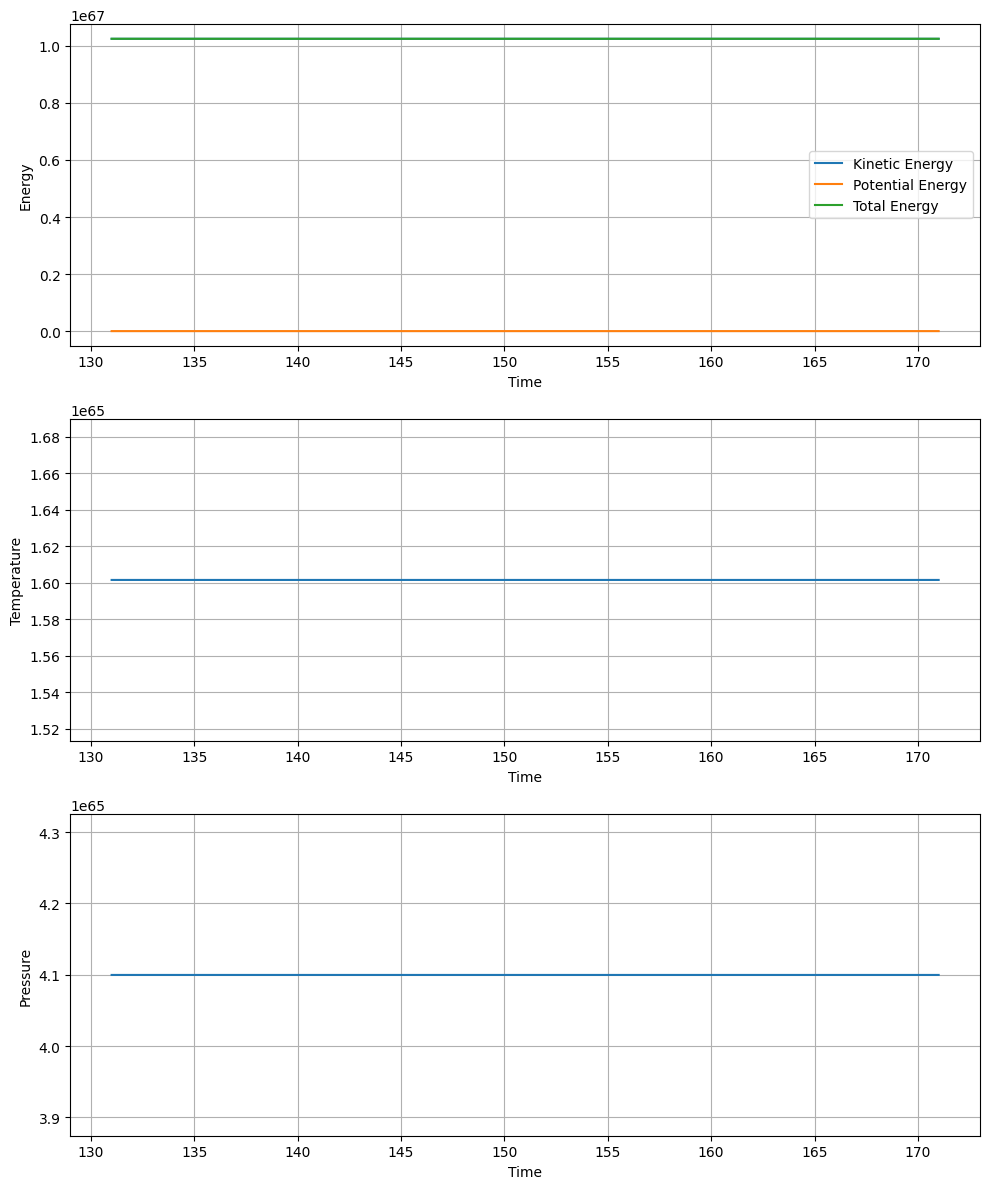

In [15]:
# Run the simulation UNTIL equilibrium (but do not record this part)
time_units = 20
steps_to_run = int(time_units / dt)

print(f"Running simulation to reach equilibrium for {time_units} time units ({steps_to_run} steps)...")
for _ in range(steps_to_run):
    sim.step()

# Now that equilibrium is reached, CLEAR history
sim.clear_history()

# Now START recording real data
print(f"Starting recording after reaching equilibrium...")

# Continue simulation in the original box (before phase change)
for _ in range(steps_to_run):
    sim.step()

# Now FORCE a phase change
sim.set_box_size(Lx / 2, Ly / 2)
print(f"Forced phase change: resized box to Lx={Lx / 2}, Ly={Ly / 2}")

# Continue simulation AFTER phase change
for _ in range(steps_to_run):
    sim.step()

# Now plot the ENTIRE history (equilibrium → phase change)
print("Plotting full history (equilibrium through phase change)...")
phase_change_fig = plot_results()

# Display the plot
display(phase_change_fig)
plt.show()


Starting simulation with box size: Lx=10.0, Ly=10.0
Phase change at time 10.00: resized box to Lx=5.0, Ly=5.0
Phase change at time 10.00: resized box to Lx=5.0, Ly=5.0
Plotting full simulation...
Plotting full simulation...


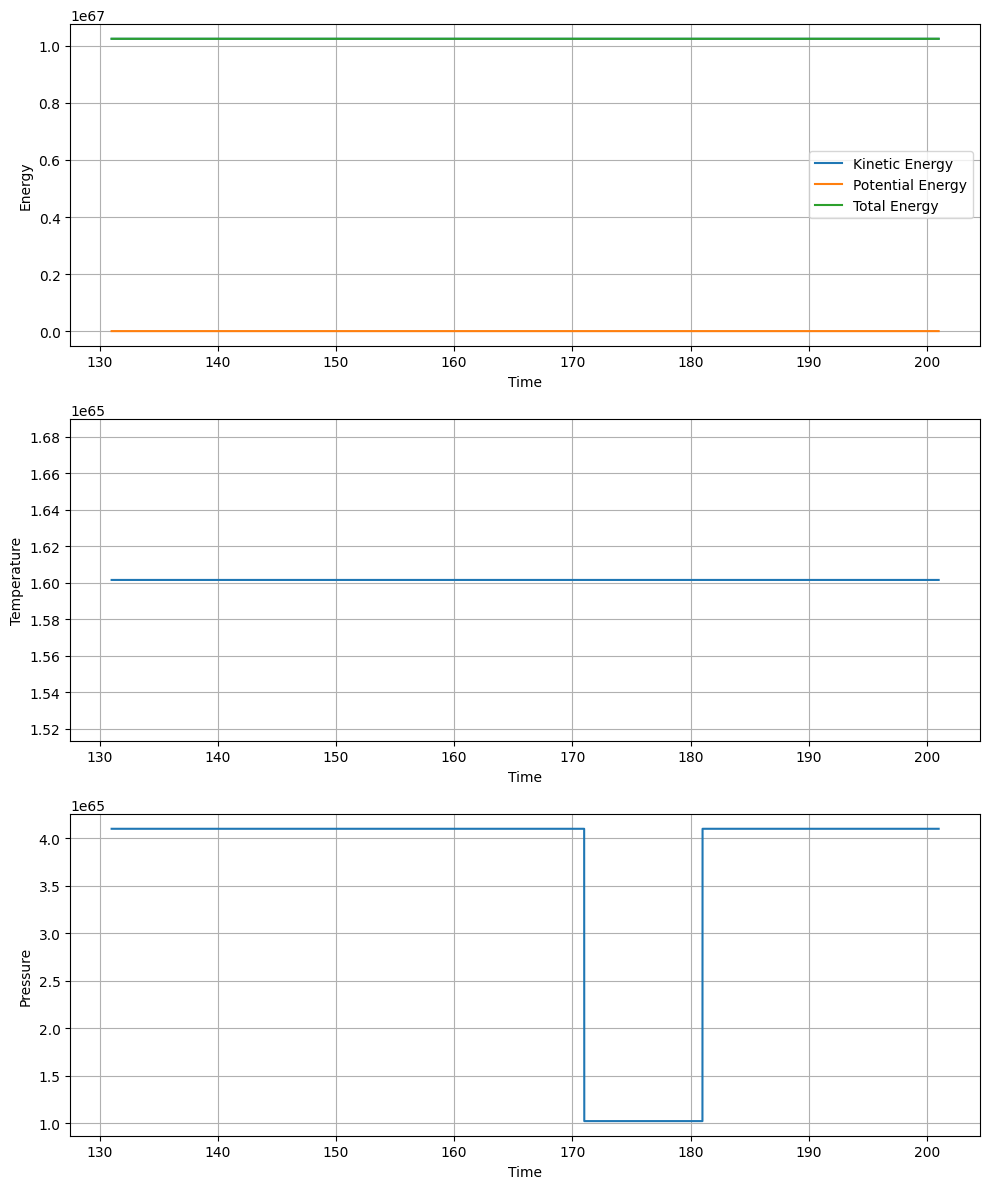

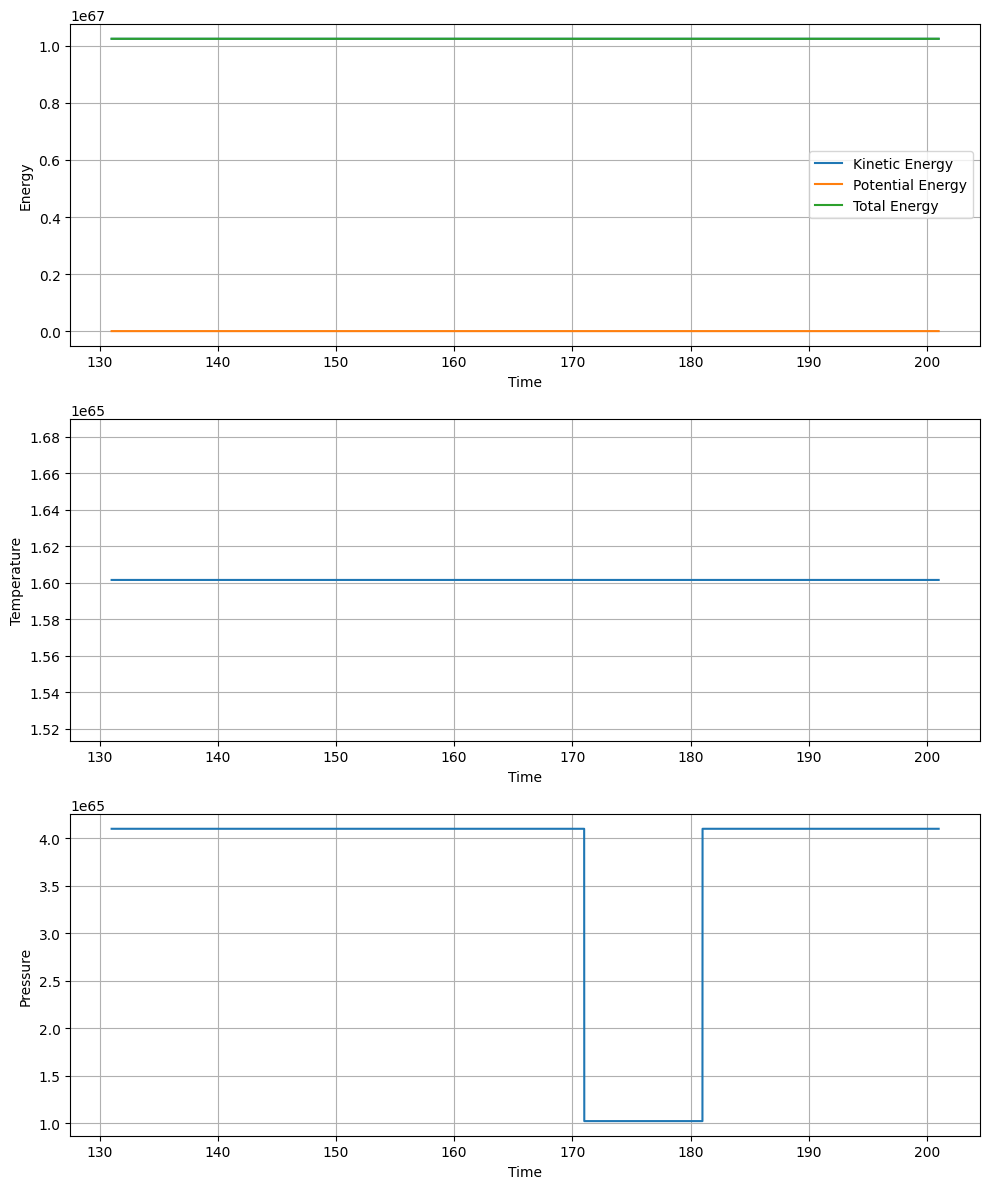

In [16]:
# Define simulation parameters
Lx, Ly = 10.0, 10.0   # Initial box size
time_to_phase_change = 10.0   # Time units before resizing
total_time = 30.0             # Total simulation time
dt = sim.dt                  # Get dt from simulator
steps_before_change = int(time_to_phase_change / dt)
total_steps = int(total_time / dt)

# Set initial box size
sim.set_box_size(Lx, Ly)
print(f"Starting simulation with box size: Lx={Lx}, Ly={Ly}")

# Run the simulation
for step in range(total_steps):
    sim.step()

    # At the right time, force the phase change
    current_time = step * dt
    if abs(current_time - time_to_phase_change) < dt / 2:
        sim.set_box_size(Lx / 2, Ly / 2)
        print(f"Phase change at time {current_time:.2f}: resized box to Lx={Lx/2}, Ly={Ly/2}")

# Plot the results
print("Plotting full simulation...")
full_simulation_fig = plot_results()

# Display the plot
display(full_simulation_fig)
plt.show()
